In [1]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [2]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)
# print(type(x))

In [3]:
# y = x
# x = len(x)

# fig, ax = plt.subplots()
# ax.plot(y, x, color= 'black') 
# plt.xlabel('Time')
# plt.ylabel('Reaction Coordinate Q')
# plt.title('Trajectory')
# plt.ylim([10, 59])
# plt.xlim([10000, 99999])
# plt.show()

In [4]:
# calculando histograma
hist, bins = np.histogram(x, bins=50, range=None, weights=None)  # 'bins' são os números que aparecem e 'hist' é quantidade de vezes que isso ocorre

# np.savetxt('hist_numpy.txt', np.column_stack((bins[:-1], hist)), fmt='%5.4f')

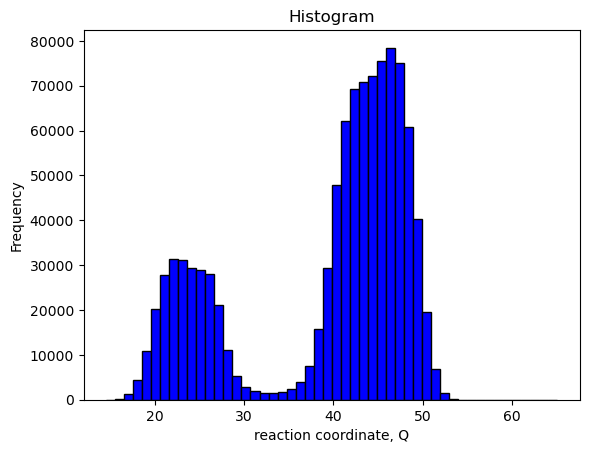

In [5]:
plt.hist(x, bins=50, color='blue', edgecolor='black')
plt.xlabel('reaction coordinate, Q')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [7]:
# Calcula o p(TP|X)

import numpy as np

def ptpx(x, x0, x1):
    
    ptpx = []
    Q = []
    
    # Garante que x0 seja menor que x1
    if x0 > x1:
        x0, x1 = x1, x0
        
    for i in x:
        if x0 <= i <= x1:
            Q.append(x)
            
    return ptpx

# teste da função
x0 = 30
x1 = 37
# dx = 0.5

result = ptpx(x, x0, x1)
print(result)

# np.savetxt('TPX.txt', result, fmt='%5.4f')

# return np.round(x, 1)

MemoryError: Unable to allocate 119. GiB for an array with shape (15924, 1000000) and data type float64

In [ ]:
x, y = zip(*result) 
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label = 'p(TP|X)')
plt.xlabel('Reaction Coordinate, Q')
plt.ylabel('p(TP|X)')
plt.xlim([None, 60])
plt.ylim([None, None])
plt.legend()
plt.show()